 #                    Payment Transactions Prediction.

## 1. Defining the Question

## a) Specifying the Question

 > Building a supervised machine learning algorithm to predict sales.

## b) Defining the Metrics for Success

> Building a machine learning algorithm with the lowest RMSE.

## c) Understanding the context

## d) Recording the Experimental Design

>Problem Definition

>Data Sourcing

>Check the Data

>Perform Data Cleaning

>Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

>Implement the Solution

>Challenge the Solution

>Follow up Questions

>Conclusions

>Recommendations

## e) Data Relevance

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in USD

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

# 2. Importing Libraries

In [1]:
from zipfile import ZipFile

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Data Wrangling
## a) Gathering Data

In [2]:
# Lets extract the csv file from a zipped file

file = 'supermarket_archive.zip'

with ZipFile(file,'r') as zip:
    print('Exctracting..0%....50%............100%')
    zip.extractall()
    print('Done!')

Exctracting..0%....50%............100%
Done!


In [3]:
# Create a funtion that reads data
def read(data):
    return pd.read_csv(data)

In [4]:
# Loading the csv file to a dataframe
supermarketdf = read('supermarket.csv')
supermarketdf.sample(5)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
559,218-59-9410,A,Member,Female,Home and lifestyle,72.42,3,10.863,3/29/2019,16:54,Ewallet,217.26,4.761905,10.863,8.2,228.123
391,173-82-9529,B,Normal,Female,Fashion accessories,37.95,10,18.975,1/26/2019,14:51,Cash,379.50,4.761905,18.975,9.7,398.475
324,746-54-5508,A,Normal,Male,Home and lifestyle,21.52,6,6.456,1/17/2019,12:48,Credit card,129.12,4.761905,6.456,9.4,135.576
207,263-87-5680,C,Member,Female,Home and lifestyle,28.53,10,14.265,3/18/2019,17:38,Ewallet,285.30,4.761905,14.265,7.8,299.565
431,574-57-9721,C,Normal,Male,Food and beverages,43.27,2,4.327,3/8/2019,16:53,Ewallet,86.54,4.761905,4.327,5.7,90.867


## b) Assessing Data

In [5]:
# Let's preview the shape of our dataset
print('The dataset has' , supermarketdf.shape, ' rows and columns respectively')

The dataset has (1000, 16)  rows and columns respectively


In [6]:
# Preview the columns of our dataset

supermarketdf.columns

Index(['Invoice ID', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Total'],
      dtype='object')

In [7]:
supermarketdf.sample(2)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
280,136-08-6195,A,Normal,Female,Home and lifestyle,69.96,8,27.9840,2/15/2019,17:01,Credit card,559.68,4.761905,27.9840,6.4,587.6640
88,504-35-8843,A,Normal,Male,Sports and travel,42.47,1,2.1235,1/2/2019,16:57,Cash,42.47,4.761905,2.1235,5.7,44.5935


In [8]:
# Check for the info of our datasets
supermarketdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax                      1000 non-null   float64
 8   Date                     1000 non-null   object 
 9   Time                     1000 non-null   object 
 10  Payment                  1000 non-null   object 
 11  cogs                     1000 non-null   float64
 12  gross margin percentage  1000 non-null   float64
 13  gross income             1000 non-null   float64
 14  Rating                   

1. Invoice ID has a wrong datatype (string instead of int).
2. Date and Time are objects are instead of datetime.
3. We need to strip off the white spaces.

In [9]:
# Lets check for misssing values
supermarketdf.isna().sum()

Invoice ID                 0
Branch                     0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax                        0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Total                      0
dtype: int64

There were no missing values.

In [10]:
# Checking for duplicates
supermarketdf.duplicated().sum()

0

There were no duplicate values.

In [11]:
# Check Cardinality
# We will use a for loop function to iterate through the columns 
# while checking for the number of unique values in each column.

# Number of unique values in the obesity dataset

def cardinal(data):
    print('Cardinality of the dataset columns : \n')
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')

        
cardinal(supermarketdf)

Cardinality of the dataset columns : 

Invoice ID : 1000
Branch : 3
Customer type : 2
Gender : 2
Product line : 6
Unit price : 943
Quantity : 10
Tax : 990
Date : 89
Time : 506
Payment : 3
cogs : 990
gross margin percentage : 1
gross income : 990
Rating : 61
Total : 990


We can decide to drop the column gross margin percentage since the whole dataset has one value.

According to an article by [investopedia](#https://www.investopedia.com/terms/g/grossmargin.asp) The gross margin (also referred to as gross profit) represents each dollar of revenue that the company retains after subtracting COGS.

 This means carrefour company's gross profit margin is 4.761905%.

In [12]:
# categorical = ['Branch','Customer type','Gender','Product line','Payment']

print('BRANCH')
print(supermarketdf['Branch'].unique())
print('----------------------------------------------------')
print('CUSTOMER TYPE')
print(supermarketdf['Customer type'].unique())
print('----------------------------------------------------')
print('GENDER')
print(supermarketdf['Gender'].unique())
print('----------------------------------------------------')
print('PRODUCT LINE')
print(supermarketdf['Product line'].unique())
print('----------------------------------------------------')
print('PAYMENT')
print(supermarketdf['Payment'].unique())

BRANCH
['A' 'C' 'B']
----------------------------------------------------
CUSTOMER TYPE
['Member' 'Normal']
----------------------------------------------------
GENDER
['Female' 'Male']
----------------------------------------------------
PRODUCT LINE
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
----------------------------------------------------
PAYMENT
['Ewallet' 'Cash' 'Credit card']


In [13]:
df1 = read('supermarket_sales.csv')
df1.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
525,719-89-8991,A,Yangon,Member,Female,Sports and travel,91.41,5,22.8525,479.9025,2/25/2019,16:03,Ewallet,457.05,4.761905,22.8525,7.1
888,137-74-8729,C,Naypyitaw,Normal,Female,Fashion accessories,12.19,8,4.8760,102.3960,3/13/2019,12:47,Ewallet,97.52,4.761905,4.8760,6.8
137,354-39-5160,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.3260,216.8460,2/18/2019,15:39,Cash,206.52,4.761905,10.3260,9.8


In [14]:
df1.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [15]:
# Lets check the summary statistics of our data

supermarketdf.describe()

,Unit price,Quantity,Tax,cogs,gross margin percentage,gross income,Rating,Total
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,307.58738,4.761905e+00,15.379369,6.97270,322.966749
std,26.494628,2.923431,11.708825,234.17651,6.131498e-14,11.708825,1.71858,245.885335
min,10.080000,1.000000,0.508500,10.17000,4.761905e+00,0.508500,4.00000,10.678500
25%,32.875000,3.000000,5.924875,118.49750,4.761905e+00,5.924875,5.50000,124.422375
50%,55.230000,5.000000,12.088000,241.76000,4.761905e+00,12.088000,7.00000,253.848000
75%,77.935000,8.000000,22.445250,448.90500,4.761905e+00,22.445250,8.50000,471.350250
max,99.960000,10.000000,49.650000,993.00000,4.761905e+00,49.650000,10.00000,1042.650000


In [16]:
# Check or the ``````````AttributeError
supermarketdf.dtypes

Invoice ID                  object
Branch                      object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax                        float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
Total                      float64
dtype: object

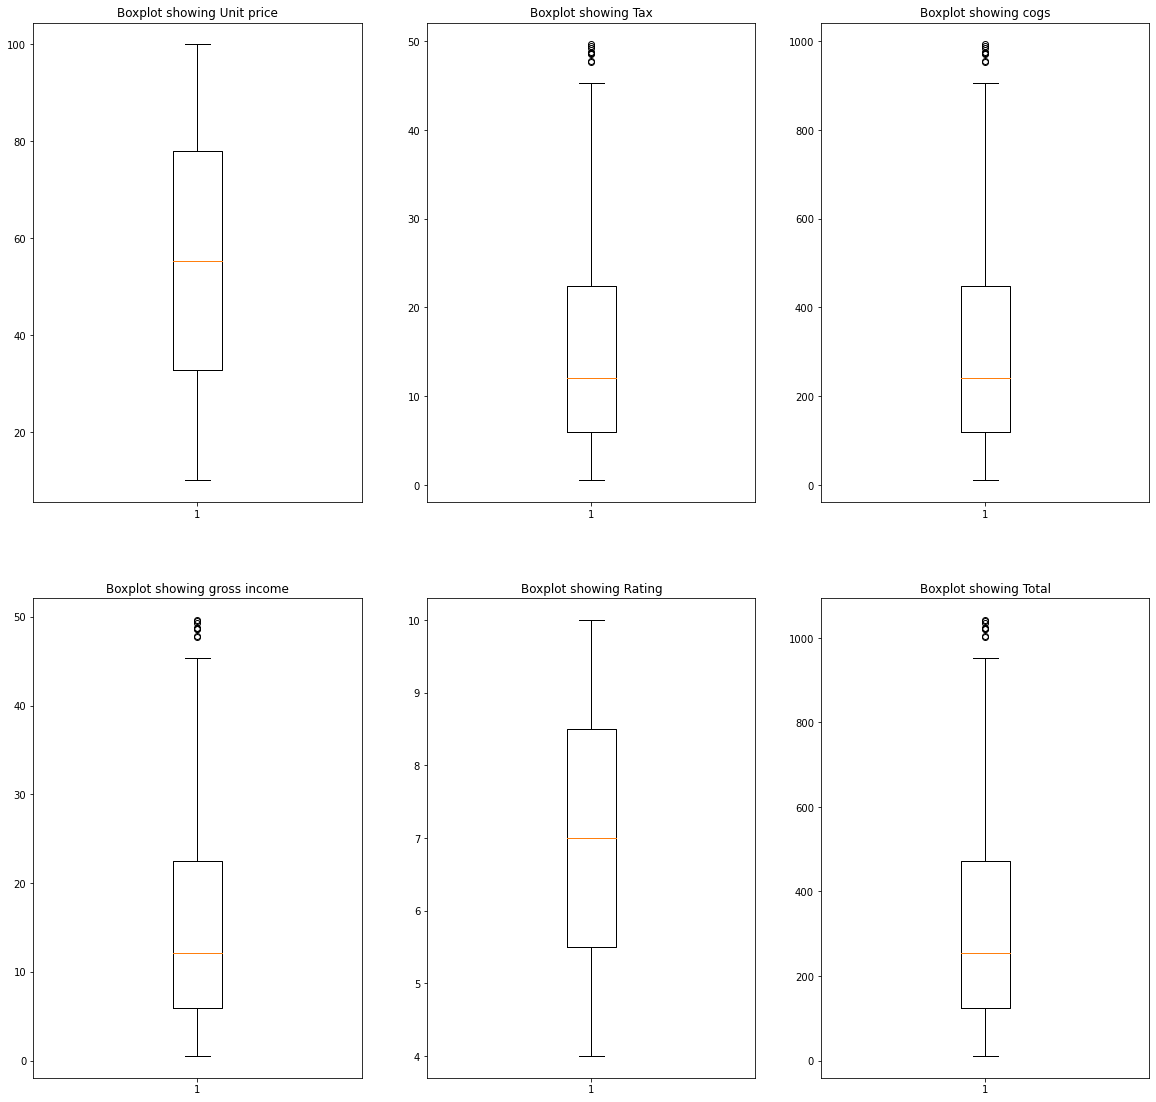

In [17]:
# checking for outliers
# define a function that plots boxplots to visualize outliers

def outliers ():
    "making a dictionary for numerical columns"
    columns_dict = {'Unit price': 1, 'Tax': 2, 'cogs': 3, 'gross income': 4, 'Rating': 5, 'Total': 6}
    plt.figure(figsize=(20,30))
    for variable,i in columns_dict.items():
      plt.subplot(3,3,i);
      plt.boxplot(supermarketdf[variable]);
      plt.title(f"Boxplot showing {variable}");
    plt.show()
outliers()

(a) Some columns have outliers.

(b) We need to assess the outliers.

In [18]:
# Lets visualize the outliers in the Tax column

supermarketdf.query('Tax > 45')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


In [19]:
# Lets visualize the outliers in the cogs column
supermarketdf.query('cogs > 900')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


In [20]:
# Lets visualize the outliers in the Totals column

supermarketdf.query('Total > 950')

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
141,280-17-4359,C,Member,Male,Health and beauty,90.50,10,45.250,1/25/2019,13:48,Cash,905.0,4.761905,45.250,8.1,950.250
166,234-65-2137,C,Normal,Male,Home and lifestyle,95.58,10,47.790,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8,1003.590
167,687-47-8271,A,Normal,Male,Fashion accessories,98.98,10,49.490,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7,1039.290
350,860-79-0874,C,Member,Female,Fashion accessories,99.30,10,49.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6,1042.650
357,554-42-2417,C,Normal,Female,Sports and travel,95.44,10,47.720,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2,1002.120
422,271-88-8734,C,Member,Female,Fashion accessories,97.21,10,48.605,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7,1020.705
429,325-77-6186,A,Member,Female,Home and lifestyle,90.65,10,45.325,3/8/2019,10:53,Ewallet,906.5,4.761905,45.325,7.3,951.825
557,283-26-5248,C,Member,Female,Food and beverages,98.52,10,49.260,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5,1034.460
699,751-41-9720,C,Normal,Male,Home and lifestyle,97.50,10,48.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0,1023.750
792,744-16-7898,B,Normal,Female,Home and lifestyle,97.37,10,48.685,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9,1022.385


Outliers shall be retained as they contain pertinent and real information.

## c) Cleaning

Lets correct the following :
1. Invoice ID has a wrong datatype (string instead of int).
2. Date and Time are objects are instead of datetime.
3. We need to strip off the white spaces and lower the cases of columns for easier computation.
4. Drop the gross_margin_percentage column, inplace = True.. :-D

In [21]:
# Make a copy of the dataframe
# Lets save the dataframe to a csv file 
cleandf = supermarketdf.copy()

# Issue 1 :

1. Lets strip white spaces from the column names and for the row invoice ID for :

    (i) Consistency
    
    (ii) Easier and faster computation.



### Code

In [22]:
# Lets use the lambda funtion to strip off white spaces

cleandf.rename(columns = lambda x : x.strip().lower().replace(" ","_"),inplace =True)

### Test

In [23]:
# Lets preview the columns

cleandf.columns

Index(['invoice_id', 'branch', 'customer_type', 'gender', 'product_line',
       'unit_price', 'quantity', 'tax', 'date', 'time', 'payment', 'cogs',
       'gross_margin_percentage', 'gross_income', 'rating', 'total'],
      dtype='object')

In [24]:
cleandf.dtypes

invoice_id                  object
branch                      object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax                        float64
date                        object
time                        object
payment                     object
cogs                       float64
gross_margin_percentage    float64
gross_income               float64
rating                     float64
total                      float64
dtype: object

# Issue 2 :
(i)The columns date and time have incorect datatypes ie object instead of datetime.

(ii)Sort the dates so as to identify the trends.

(iii) Split time to hours and minutes, Split date to years, months and days.

## Code

#### Splitting of the dataset

In [25]:
# Lets split the time to hours and minutes. This is required for the machine to learn trends easier.

cleandf['hour'] = cleandf['time'].apply(lambda x :x.split(':')[0])
cleandf['min'] = cleandf['time'].apply(lambda x :x.split(':')[1])


In [26]:
# Lets split the date to years,months and days. This is required for the machine to learn trends easier.

cleandf['day'] = cleandf['date'].apply(lambda x :x.split('/')[0])
cleandf['month'] = cleandf['date'].apply(lambda x :x.split('/')[1])
cleandf['year'] = cleandf['date'].apply(lambda x :x.split('/')[2])

#### Inspecting the data types

In [27]:
# Lets change the datatype of the date column to datetime.

cleandf['date'] = pd.to_datetime(cleandf['date'])

In [28]:
# lets change hours,minutes, year, month and day to integers

cleandf[['hour','min','year','month','day']] = cleandf[['hour','min','year','month','day']].astype('int64')

#### Test

In [29]:
# Check for the datatypes
cleandf.dtypes

invoice_id                         object
branch                             object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax                               float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
total                             float64
hour                                int64
min                                 int64
day                                 int64
month                               int64
year                                int64
dtype: object

#### Sorting the dates

In [30]:
# Sorting date and time from the 'oldest' transaction to the most recent one
cleandf = cleandf.sort_values(by = ['date','time'])   

In [31]:
# Lets display the first five rows to display the order
cleandf.head()

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,...,cogs,gross_margin_percentage,gross_income,rating,total,hour,min,day,month,year
17,765-26-6951,A,Normal,Male,Sports and travel,72.61,6,21.783,2019-01-01,10:39,...,435.66,4.761905,21.783,6.9,457.443,10,39,1,1,2019
970,746-04-1077,B,Member,Female,Food and beverages,84.63,10,42.315,2019-01-01,11:36,...,846.30,4.761905,42.315,9.0,888.615,11,36,1,1,2019
839,271-77-8740,C,Member,Female,Sports and travel,29.22,6,8.766,2019-01-01,11:40,...,175.32,4.761905,8.766,5.0,184.086,11,40,1,1,2019
523,133-14-7229,C,Normal,Male,Health and beauty,62.87,2,6.287,2019-01-01,11:43,...,125.74,4.761905,6.287,5.0,132.027,11,43,1,1,2019
567,651-88-7328,A,Normal,Female,Fashion accessories,65.74,9,29.583,2019-01-01,13:55,...,591.66,4.761905,29.583,7.7,621.243,13,55,1,1,2019


# Issue 3

In [32]:
cleandf['invoice_id'].replace('-','')

17     765-26-6951
970    746-04-1077
839    271-77-8740
523    133-14-7229
567    651-88-7328
          ...     
671    642-61-4706
474    676-39-6028
473    731-59-7531
643    131-15-8856
963    364-34-2972
Name: invoice_id, Length: 1000, dtype: object

In [33]:
cleandf.sample(2)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,...,cogs,gross_margin_percentage,gross_income,rating,total,hour,min,day,month,year
252,883-17-4236,C,Normal,Female,Sports and travel,14.39,2,1.439,2019-03-02,19:44,...,28.78,4.761905,1.439,7.2,30.219,19,44,3,2,2019
311,181-94-6432,C,Member,Male,Fashion accessories,69.33,2,6.933,2019-02-05,19:05,...,138.66,4.761905,6.933,9.7,145.593,19,5,2,5,2019


# Issue 4 
Drop the gross margin percentage permanently from our data

## Code

In [34]:
cleandf.drop(columns = 'gross_margin_percentage',inplace = True)

In [35]:
cleandf.drop(columns = 'invoice_id',inplace = True)

In [36]:
cleandf.drop(columns = 'time',inplace = True)

## Test

In [37]:
cleandf.sample(2)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,hour,min,day,month,year
106,C,Normal,Male,Fashion accessories,27.38,6,8.214,2019-01-05,Credit card,164.28,8.214,7.9,172.494,20,54,1,5,2019
3,A,Member,Male,Health and beauty,58.22,8,23.288,2019-01-27,Ewallet,465.76,23.288,8.4,489.048,20,33,1,27,2019


In [38]:
# Lets save the dataframe to a csv file 
cleandf.to_csv('clean_df.csv',index=False)

In [39]:
cleandf.head()

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,hour,min,day,month,year
17,A,Normal,Male,Sports and travel,72.61,6,21.783,2019-01-01,Credit card,435.66,21.783,6.9,457.443,10,39,1,1,2019
970,B,Member,Female,Food and beverages,84.63,10,42.315,2019-01-01,Credit card,846.30,42.315,9.0,888.615,11,36,1,1,2019
839,C,Member,Female,Sports and travel,29.22,6,8.766,2019-01-01,Ewallet,175.32,8.766,5.0,184.086,11,40,1,1,2019
523,C,Normal,Male,Health and beauty,62.87,2,6.287,2019-01-01,Cash,125.74,6.287,5.0,132.027,11,43,1,1,2019
567,A,Normal,Female,Fashion accessories,65.74,9,29.583,2019-01-01,Cash,591.66,29.583,7.7,621.243,13,55,1,1,2019


# 4. Exploratory Data Analysis

## (a) Univariate Analysis

<Figure size 1000x300 with 0 Axes>

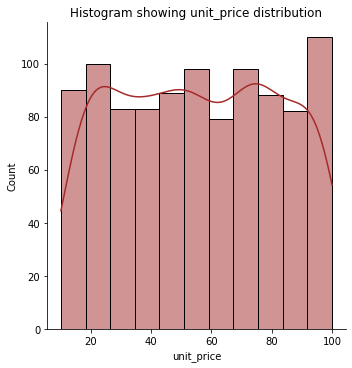

<Figure size 1000x300 with 0 Axes>

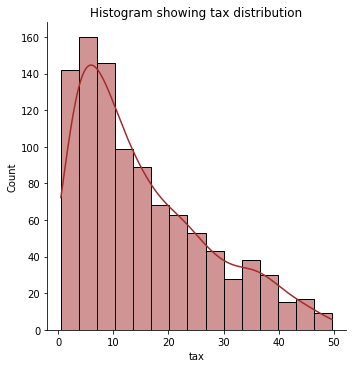

<Figure size 1000x300 with 0 Axes>

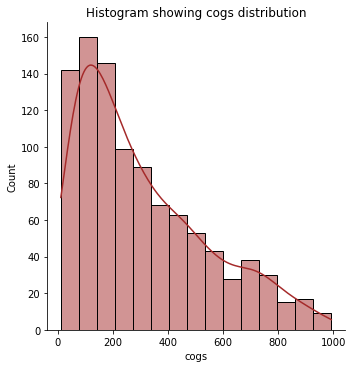

<Figure size 1000x300 with 0 Axes>

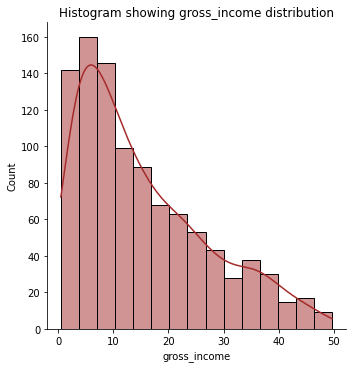

<Figure size 1000x300 with 0 Axes>

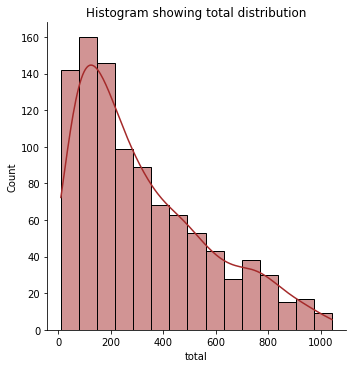

In [40]:
#Plotting histrograms for categorical values
# columns_dict = ['unit_price','tax','cogs','gross_income','total']

def histogram (v):
    columns_dict = ['unit_price','tax','cogs','gross_income','total']
    for i in columns_dict:
      plt.figure(figsize = (10,3), dpi=100)
      sns.displot(v[i], kde = True, color = 'brown')
      plt.title(f"Histogram showing {i} distribution", color = 'Black')
      plt.show()

histogram (cleandf);

In [43]:
cleandf.sample(3)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,hour,min,day,month,year
415,B,Normal,Male,Health and beauty,96.11,1,4.8055,2019-01-25,Ewallet,96.11,4.8055,7.8,100.9155,16,28,1,25,2019
443,C,Normal,Male,Fashion accessories,12.78,1,0.6390,2019-01-08,Ewallet,12.78,0.6390,9.5,13.4190,14,11,1,8,2019
516,B,Member,Male,Health and beauty,54.86,5,13.7150,2019-03-29,Ewallet,274.30,13.7150,9.8,288.0150,16,48,3,29,2019


In [44]:
# 
cleandf[['product_line','total']].groupby('product_line').sum('total')

,total
product_line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [45]:
# 
cleandf[['product_line','tax']].groupby('product_line').sum('tax')


,tax
product_line,
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Food and beverages,2673.5640
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Sports and travel,2624.8965


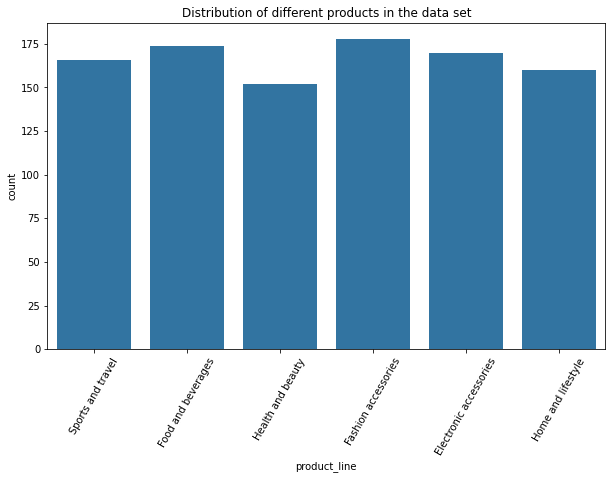

In [46]:
# Lets plot the distribution of patients by age groups
base_color = sns.color_palette()[0]
plt.figure(figsize=(10,6))
sns.countplot(x=cleandf['product_line'],color = base_color)
plt.xticks(rotation=60);
plt.title('Distribution of different products in the data set');

# code to arrange them in descending order

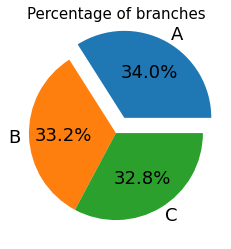

In [47]:
branch_count = cleandf['branch'].value_counts()

plt.pie(branch_count,labels=["A", "B","C"], autopct='%1.1f%%', textprops={'fontsize': 18},
        explode = (0.2, 0,0))

plt.rcParams['font.size'] = 12
plt.title("Percentage of branches",fontsize=15)
# plt.legend(loc ='right')
plt.show()

Branch A had slightly higher sales than other branches

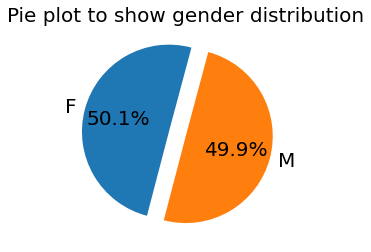

In [48]:
gender_count =cleandf.gender.value_counts()

plt.pie(gender_count,labels = ['F','M'],autopct = '%1.1f%%',textprops ={'fontsize' : 20},
       explode = (0.2,0),startangle = 75)
plt.rcParams['font.size'] = 14
plt.title('Pie plot to show gender distribution',fontsize = 20)
plt.show()

In [49]:
gender_count

Female    501
Male      499
Name: gender, dtype: int64

The gender distribution is almost equal.

In [50]:
product_count = cleandf.product_line.value_counts()
product_count

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

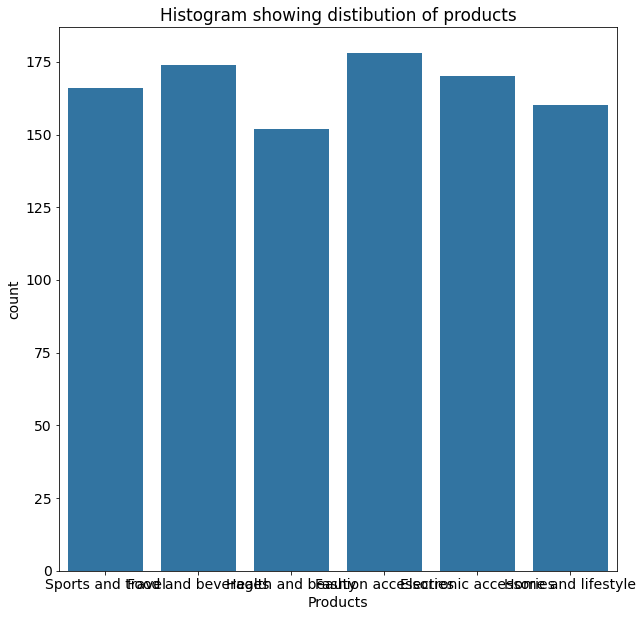

In [53]:
color = sns.color_palette()[0]

plt.figure(figsize = (10,10))
sns.countplot(x = cleandf['product_line'],color = color)
plt.xlabel('Products')
plt.title('Histogram showing distibution of products')
plt.show();

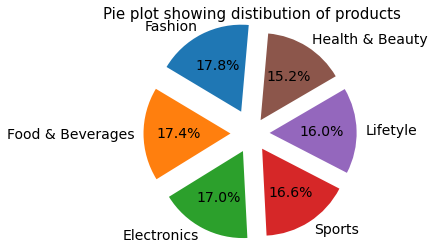

In [54]:
plt.pie(product_count,labels = ['Fashion','Food & Beverages','Electronics','Sports','Lifetyle','Health & Beauty'],
       explode = (0.28,0.25,0.23,0.21,0.2,0.18),startangle=85,autopct ='%1.1f%%')
plt.rcParams['font.size'] = 14
plt.title('Pie plot showing distibution of products',fontsize = 15);

In [55]:
payment_count =cleandf.payment.value_counts()
payment_count

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

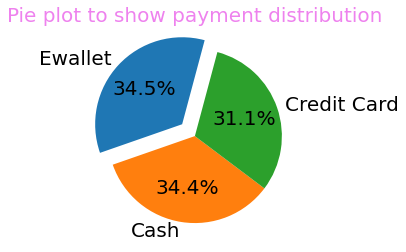

In [56]:
payment_count =cleandf.payment.value_counts()

plt.pie(payment_count,labels = ['Ewallet','Cash','Credit Card'],autopct = '%1.1f%%',textprops ={'fontsize' : 20},
       explode = (0.2,0,0),startangle = 75)
plt.rcParams['font.size'] = 14
plt.title('Pie plot to show payment distribution',fontsize = 20,color ='violet')
plt.show()

# (b) Bivariate Analysis

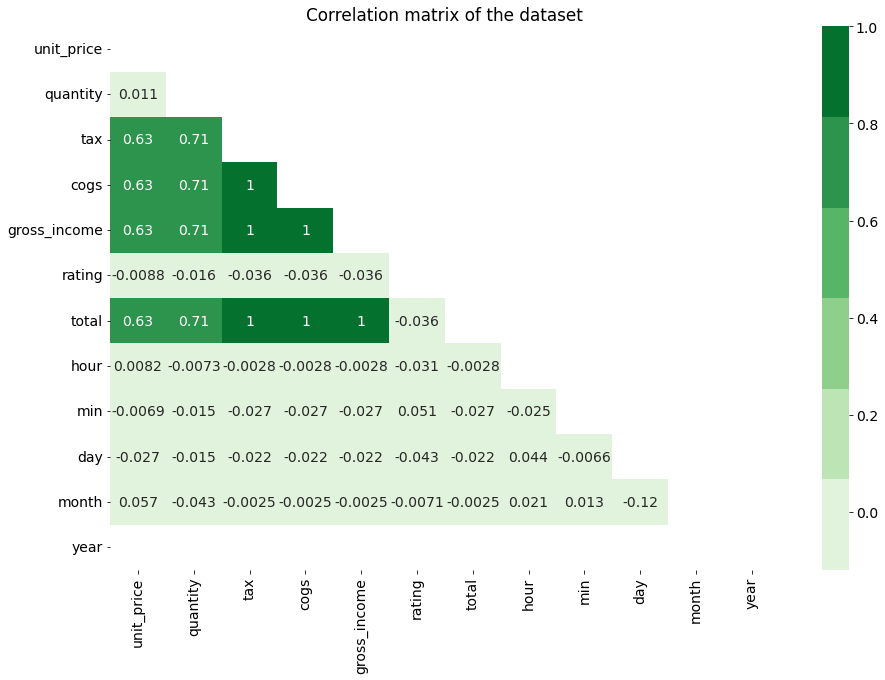

In [57]:
## Plotting a correlation matrix

def Cormatrix (h):
      plt.subplots(figsize=(15,10))
      mask = np.triu(np.ones_like(h.corr()))
      colormap = sns.color_palette("Greens")
      dataplot = sns.heatmap(h.corr(), cmap=colormap, annot=True, mask=mask)
      dataplot.set_title("Correlation matrix of the dataset")
      plt.show()

Cormatrix (cleandf)

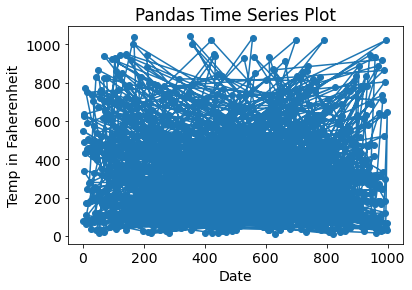

In [58]:
# Import Library

import matplotlib.pyplot as plt

# Plot

plt.plot(cleandf["total"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Temp in Faherenheit")
plt.title("Pandas Time Series Plot")

# Display

plt.show()

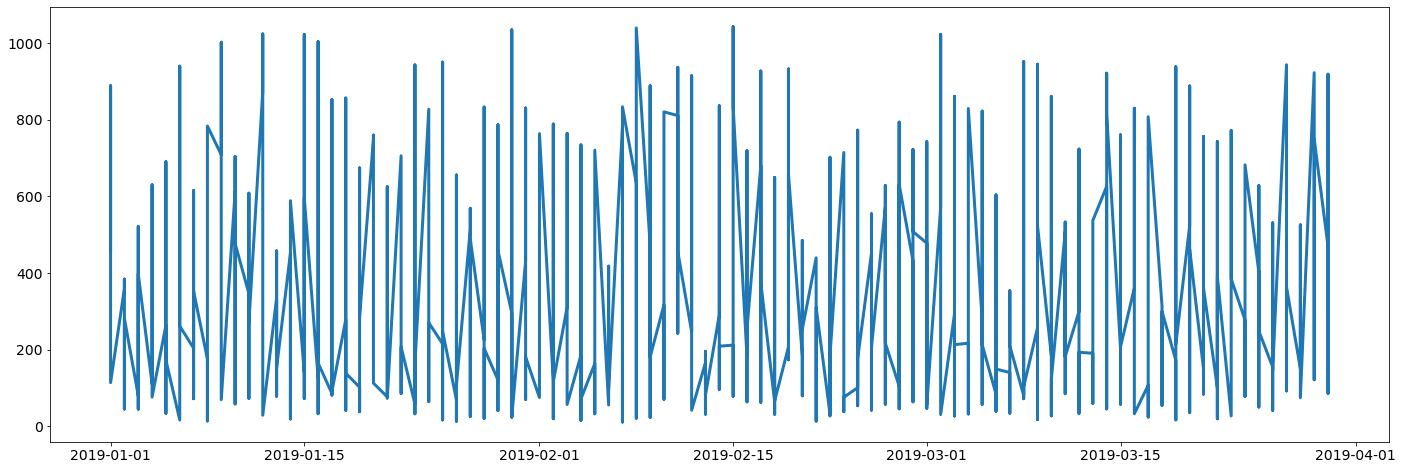

In [59]:
fig = plt.figure(figsize=(24, 8))
plt.plot(cleandf.date, cleandf.total, label='blogs_read', 
         linewidth=3);

# (c) Multivariate Analysis

In [60]:
cleandf.sample(2)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,hour,min,day,month,year
820,B,Normal,Male,Electronic accessories,52.89,4,10.578,2019-03-25,Ewallet,211.56,10.578,6.7,222.138,16,32,3,25,2019
34,C,Member,Female,Food and beverages,99.42,4,19.884,2019-02-06,Ewallet,397.68,19.884,7.5,417.564,10,42,2,6,2019


In [61]:
cleandf.dtypes

branch                   object
customer_type            object
gender                   object
product_line             object
unit_price              float64
quantity                  int64
tax                     float64
date             datetime64[ns]
payment                  object
cogs                    float64
gross_income            float64
rating                  float64
total                   float64
hour                      int64
min                       int64
day                       int64
month                     int64
year                      int64
dtype: object

## Feature Engineering

In [62]:
cleandf.dtypes

branch                   object
customer_type            object
gender                   object
product_line             object
unit_price              float64
quantity                  int64
tax                     float64
date             datetime64[ns]
payment                  object
cogs                    float64
gross_income            float64
rating                  float64
total                   float64
hour                      int64
min                       int64
day                       int64
month                     int64
year                      int64
dtype: object

### Label Encoding

In [63]:
# Lets label encode
# Make a copy of the df
cleandf_01 = cleandf.copy()


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

objects = [col for col in cleandf.columns if cleandf[col].dtype == 'object']
objects

['branch', 'customer_type', 'gender', 'product_line', 'payment']

In [64]:
for col in objects :
    cleandf[col] = le.fit_transform(cleandf[col])

In [65]:
cleandf.sample(3)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,hour,min,day,month,year
643,2,0,0,2,72.52,8,29.0080,2019-03-30,1,580.16,29.0080,4.0,609.1680,19,26,3,30,2019
452,0,1,0,2,63.61,5,15.9025,2019-03-16,2,318.05,15.9025,4.8,333.9525,12,43,3,16,2019
528,1,0,0,2,54.36,10,27.1800,2019-02-07,1,543.60,27.1800,6.1,570.7800,11,28,2,7,2019


## Generating cyclical time features


In [66]:
# Lets convert hours to cos and sin
# This will help the machine learn easier since our time is in 24 hrs. 
# This is because theres no way youll convince the machine 0 hrs comes immediately after 23hrs

def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(cleandf['hour']-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(cleandf['hour']-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

cleandf = generate_cyclical_features(cleandf, 'hour', 24, 0)



In [67]:
cleandf.head()

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,min,day,month,year,sin_hour,cos_hour
17,0,1,1,5,72.61,6,21.783,2019-01-01,1,435.66,21.783,6.9,457.443,39,1,1,2019,0.500000,-0.866025
970,1,0,0,2,84.63,10,42.315,2019-01-01,1,846.30,42.315,9.0,888.615,36,1,1,2019,0.258819,-0.965926
839,2,0,0,5,29.22,6,8.766,2019-01-01,2,175.32,8.766,5.0,184.086,40,1,1,2019,0.258819,-0.965926
523,2,1,1,3,62.87,2,6.287,2019-01-01,0,125.74,6.287,5.0,132.027,43,1,1,2019,0.258819,-0.965926
567,0,1,0,1,65.74,9,29.583,2019-01-01,0,591.66,29.583,7.7,621.243,55,1,1,2019,-0.258819,-0.965926


## Principal Component Analysis

In [68]:
cleandf_01.to_csv('cleaned.csv',index = False)

In [69]:
cleandf.columns

Index(['branch', 'customer_type', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax', 'date', 'payment', 'cogs', 'gross_income', 'rating',
       'total', 'min', 'day', 'month', 'year', 'sin_hour', 'cos_hour'],
      dtype='object')

In [70]:
cleandf.head(5)

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,min,day,month,year,sin_hour,cos_hour
17,0,1,1,5,72.61,6,21.783,2019-01-01,1,435.66,21.783,6.9,457.443,39,1,1,2019,0.500000,-0.866025
970,1,0,0,2,84.63,10,42.315,2019-01-01,1,846.30,42.315,9.0,888.615,36,1,1,2019,0.258819,-0.965926
839,2,0,0,5,29.22,6,8.766,2019-01-01,2,175.32,8.766,5.0,184.086,40,1,1,2019,0.258819,-0.965926
523,2,1,1,3,62.87,2,6.287,2019-01-01,0,125.74,6.287,5.0,132.027,43,1,1,2019,0.258819,-0.965926
567,0,1,0,1,65.74,9,29.583,2019-01-01,0,591.66,29.583,7.7,621.243,55,1,1,2019,-0.258819,-0.965926


In [71]:
# Preprocessing data

X = cleandf.drop(['total','date','rating'],1)
y = cleandf['total']

In [72]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle = False)

In [73]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [75]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.62773563e-01, 1.18597835e-01, 9.30786032e-02, 7.56077242e-02,
       7.23173586e-02, 6.84007031e-02, 6.54411833e-02, 6.27077792e-02,
       6.12459659e-02, 5.68878371e-02, 4.07415671e-02, 1.66855286e-02,
       5.51435125e-03, 7.68665505e-33, 1.56209300e-33, 2.41275284e-67])

In [76]:
cleandf.columns

Index(['branch', 'customer_type', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax', 'date', 'payment', 'cogs', 'gross_income', 'rating',
       'total', 'min', 'day', 'month', 'year', 'sin_hour', 'cos_hour'],
      dtype='object')

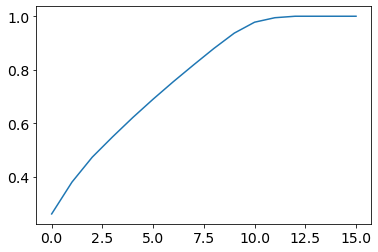

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestRegressor

classifier = RandomForestRegressor(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(actual, predictions):
    return np.sqrt(mean_squared_error(actual, predictions))

# Evaluating the model using RMSE Evaluation Metric
print('RSME is : ',root_mean_squared_error(y_test, y_pred))

print('MSE is : ', mean_squared_error(y_test,y_pred))

RSME is :  54.056327005797996
MSE is :  2922.086489357766


# Implementing the Solution

# XG Boost

In [81]:
cleandf.columns

Index(['branch', 'customer_type', 'gender', 'product_line', 'unit_price',
       'quantity', 'tax', 'date', 'payment', 'cogs', 'gross_income', 'rating',
       'total', 'min', 'day', 'month', 'year', 'sin_hour', 'cos_hour'],
      dtype='object')

In [82]:
cleandf.head()

,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,payment,cogs,gross_income,rating,total,min,day,month,year,sin_hour,cos_hour
17,0,1,1,5,72.61,6,21.783,2019-01-01,1,435.66,21.783,6.9,457.443,39,1,1,2019,0.500000,-0.866025
970,1,0,0,2,84.63,10,42.315,2019-01-01,1,846.30,42.315,9.0,888.615,36,1,1,2019,0.258819,-0.965926
839,2,0,0,5,29.22,6,8.766,2019-01-01,2,175.32,8.766,5.0,184.086,40,1,1,2019,0.258819,-0.965926
523,2,1,1,3,62.87,2,6.287,2019-01-01,0,125.74,6.287,5.0,132.027,43,1,1,2019,0.258819,-0.965926
567,0,1,0,1,65.74,9,29.583,2019-01-01,0,591.66,29.583,7.7,621.243,55,1,1,2019,-0.258819,-0.965926


In [83]:
# Linear regression
X = cleandf.drop(['total','date','rating'],1)
y = cleandf['total']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [85]:
import xgboost as xg

In [86]:
# model without hyperparameters
from sklearn.linear_model import LinearRegression


xgb_r = xg.XGBRegressor()
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

In [87]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(2)

,Actual,Predicted
941,943.2990,927.072571
270,354.0075,350.949585


In [88]:
df.describe()

,Actual,Predicted
count,300.000000,300.000000
mean,315.956515,315.500977
std,240.994547,240.921860
min,16.275000,16.399591
25%,126.824250,126.685297
50%,234.218250,232.036667
75%,461.377875,456.903938
max,951.825000,966.394104


In [89]:
from sklearn.linear_model import LinearRegression


xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10)
  
# Fitting the model
model = xgb_r.fit(X_train, y_train)
  
# Predict the model
y_pred = xgb_r.predict(X_test)

[13:29:39] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
803,462.672,441.052673
589,76.755,75.575020
692,510.615,482.477539
283,628.929,610.347168
966,314.685,302.708160
...,...,...
671,196.140,189.207291
474,338.310,329.245270
473,609.588,579.570862
643,609.168,579.570862


In [91]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  14.029767


In [92]:
df.describe()

,Actual,Predicted
count,300.000000,300.000000
mean,315.956515,305.885529
std,240.994547,233.438171
min,16.275000,15.852458
25%,126.824250,122.482849
50%,234.218250,222.075623
75%,461.377875,441.052673
max,951.825000,930.425293


In [95]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.177247490946453
Mean Squared Error: 196.83435509509619
Root Mean Squared Error: 14.02976675127196


In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:


# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Challenging the solution

## Random Forest Regressor

In [ ]:
cleandf.sample(2)

In [ ]:
X = cleandf.drop(['total','date','rating'],1)
y = cleandf['total']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)


In [ ]:
comparison_frame.describe()

There is overfitting.

Hyperameter tuning

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.head(5)


In [ ]:
comparison_frame.describe()

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Conclusion

1. Store A has the highest number of sales 
2. Gender is almost equal in proportion
3. Many people pay via ewallet
4. Most of the numerical variables are not normally distributed.
5. Correlation
6. ML prediction with an accuracy of.
